# Análises para o banner

# Analisando série de retornos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emd
from scipy.signal import hilbert

## Carregando os dados do IMEA - Soja Sorriso-MT

In [3]:
sorriso = pd.read_excel(r'C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\Series_Precos\Sorriso_jan21-set24.xlsx')

sorriso.head()

Cidade       Data       Valor         Unidade
0  Sorriso 2021-01-11  151.193366  Reais por saca
1  Sorriso 2021-01-12  152.695531  Reais por saca
2  Sorriso 2021-01-13  148.774896  Reais por saca
3  Sorriso 2021-01-14  148.430713  Reais por saca
4  Sorriso 2021-01-15  149.769147  Reais por saca

## Tratando as colunas

In [4]:
sorriso.drop(columns=['Cidade', 'Unidade'], axis=1, inplace=True)
sorriso.set_index('Data', inplace=True)
sorriso['Retornos'] = sorriso['Valor'].pct_change()
sorriso.dropna(subset=['Retornos'], inplace=True)
sorriso.head(2)

Valor  Retornos
Data                            
2021-01-12  152.695531  0.009935
2021-01-13  148.774896 -0.025676

## Plot dos preços

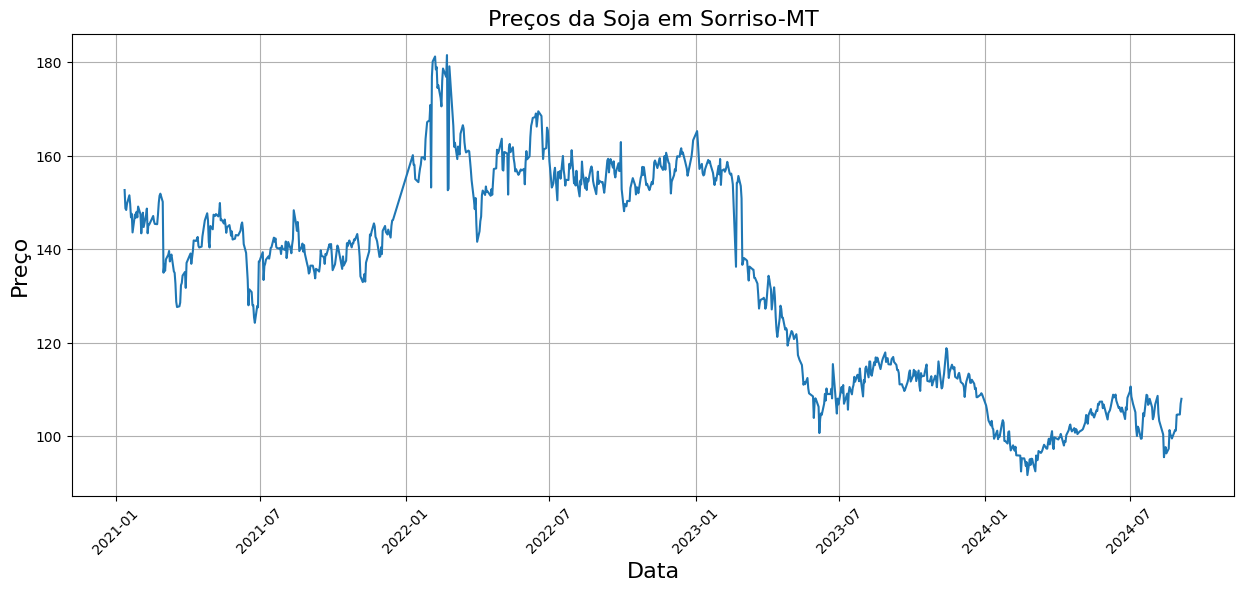

In [8]:
plt.figure(figsize=(15,6))
plt.plot(sorriso['Valor'])
plt.title('Preços da Soja em Sorriso-MT', fontsize=16)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Preço', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Plot dos retornos

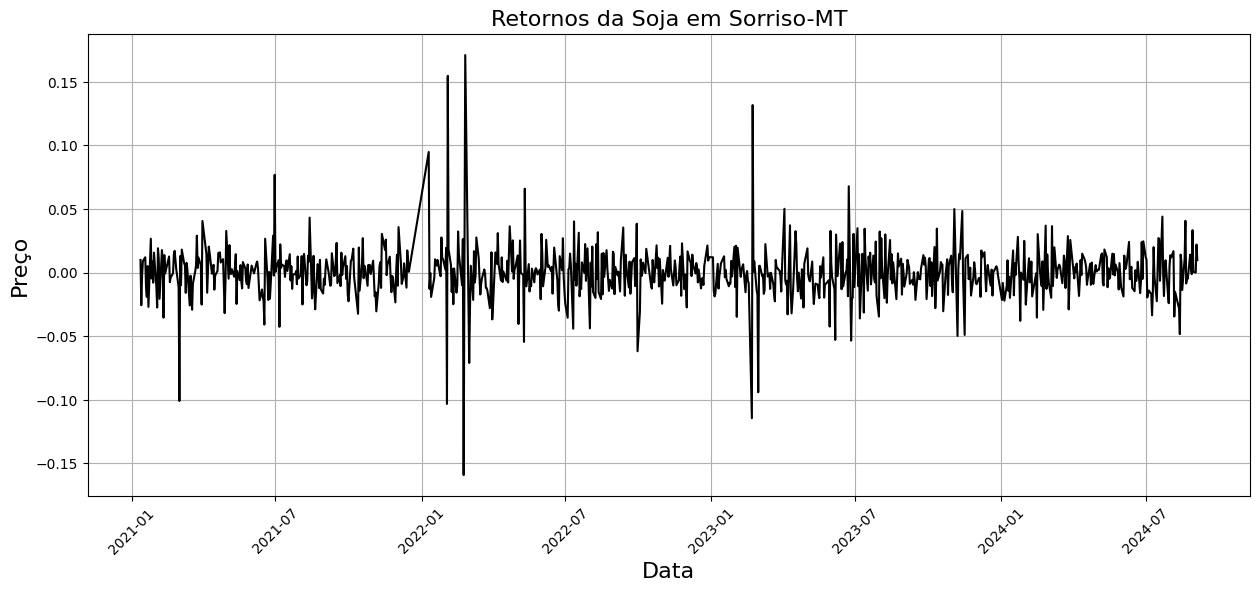

In [10]:
plt.figure(figsize=(15,6))
plt.plot(sorriso['Retornos'], color='black')
plt.title('Retornos da Soja em Sorriso-MT', fontsize=16)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Preço', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Hilbert-Huang - Retornos
Gerar a segunda IMF

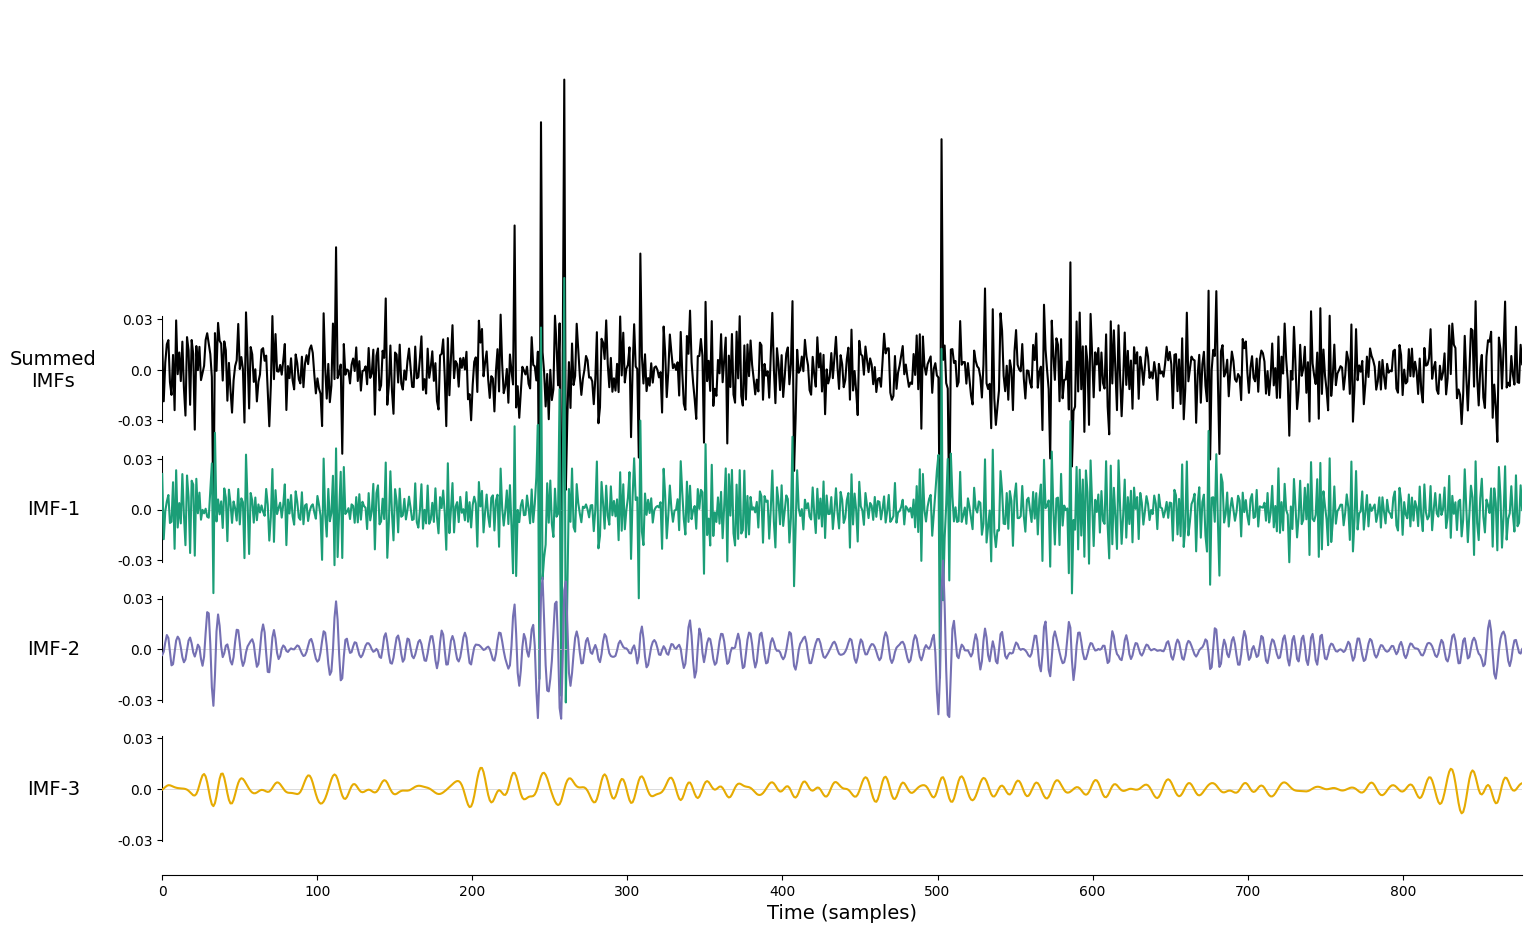

In [11]:
retornos = np.array(sorriso['Retornos'])
imf = emd.sift.mask_sift(retornos, max_imfs=3)

emd.plotting.plot_imfs(imf)
plt.show()

In [18]:
#IP: Fase Instantânea, IF: Frequência instantânea, IA: Amplitude Instantânea
IP, IF, IA = emd.spectra.frequency_transform(imf, len(retornos), 'nht')

IP2_unwrapped = np.unwrap(IP[:, 1])

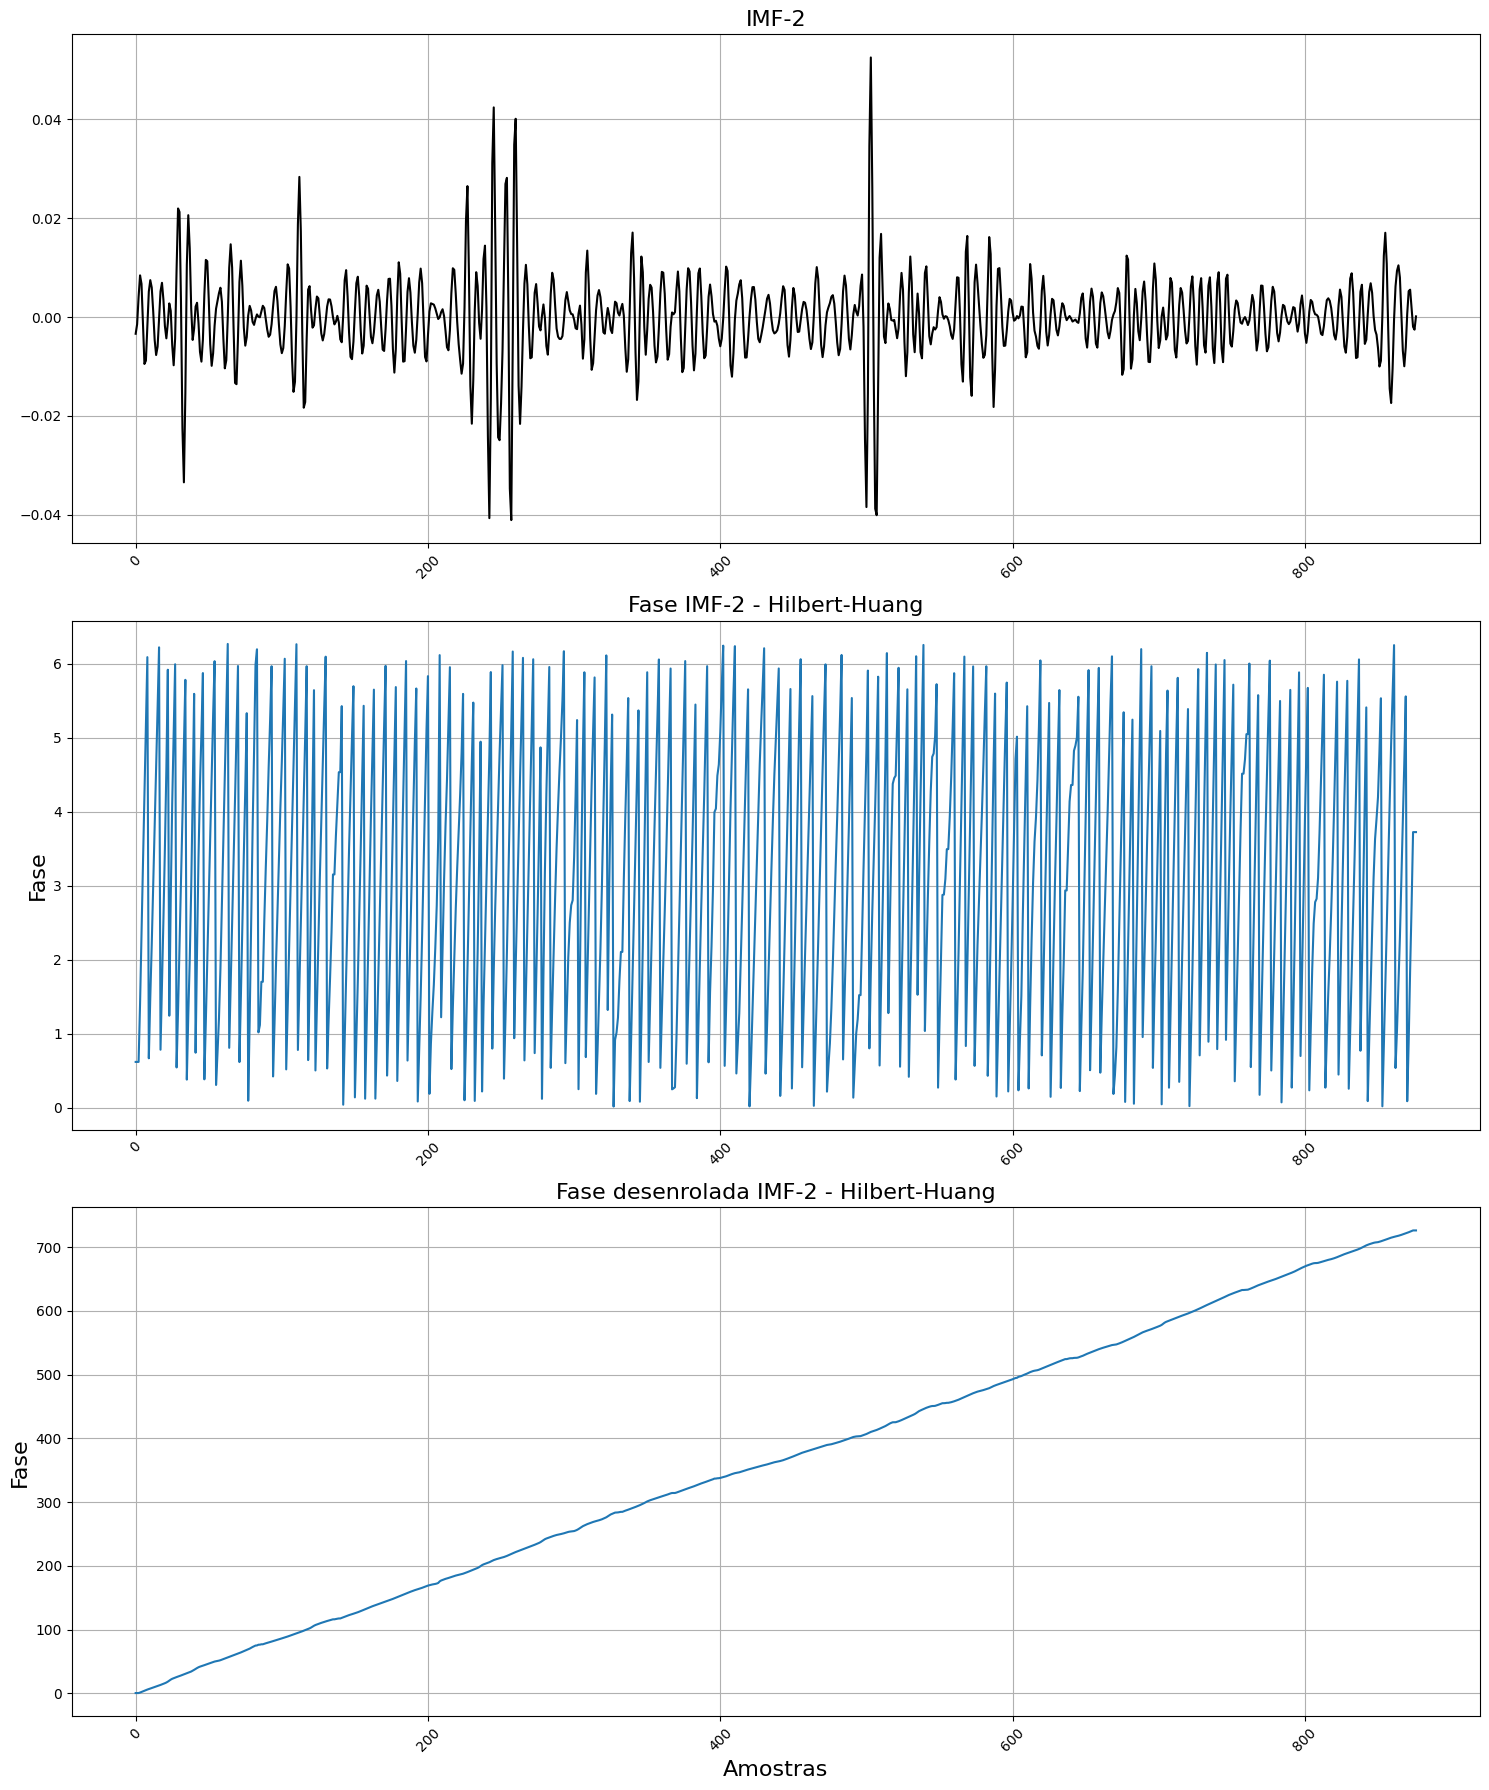

In [23]:
plt.figure(figsize=(15, 18))

# Primeiro subplot - IMF-2
plt.subplot(3, 1, 1)
plt.plot(imf[:, 1], color='black')
plt.title('IMF-2', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

# Segundo subplot - Fase IMF-2
plt.subplot(3, 1, 2)
plt.plot(IP[:, 1])
plt.title('Fase IMF-2 - Hilbert-Huang', fontsize=16)
plt.ylabel('Fase', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

# Terceiro subplot - Fase desenrolada IMF-2
plt.subplot(3, 1, 3)
plt.plot(IP2_unwrapped)
plt.title('Fase desenrolada IMF-2 - Hilbert-Huang', fontsize=16)
plt.xlabel('Amostras', fontsize=16)
plt.ylabel('Fase', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()

plt.show()

### Fourier - Retornos

In [24]:
# Calcular a Transformada de Fourier
n = len(retornos)
z = np.fft.fft(retornos)
freq = np.fft.fftfreq(n)

# Zerar os valores com frequência negativa (apenas para considerar a parte positiva)
z[freq < 0] = 0

# Calcular a Transformada Inversa de Fourier
w = np.fft.ifft(z)

fase_retorno_fourier = np.angle(w)

fase_unwrapped_fourier = np.unwrap(fase_retorno_fourier)

### Plot das fases de Fourier

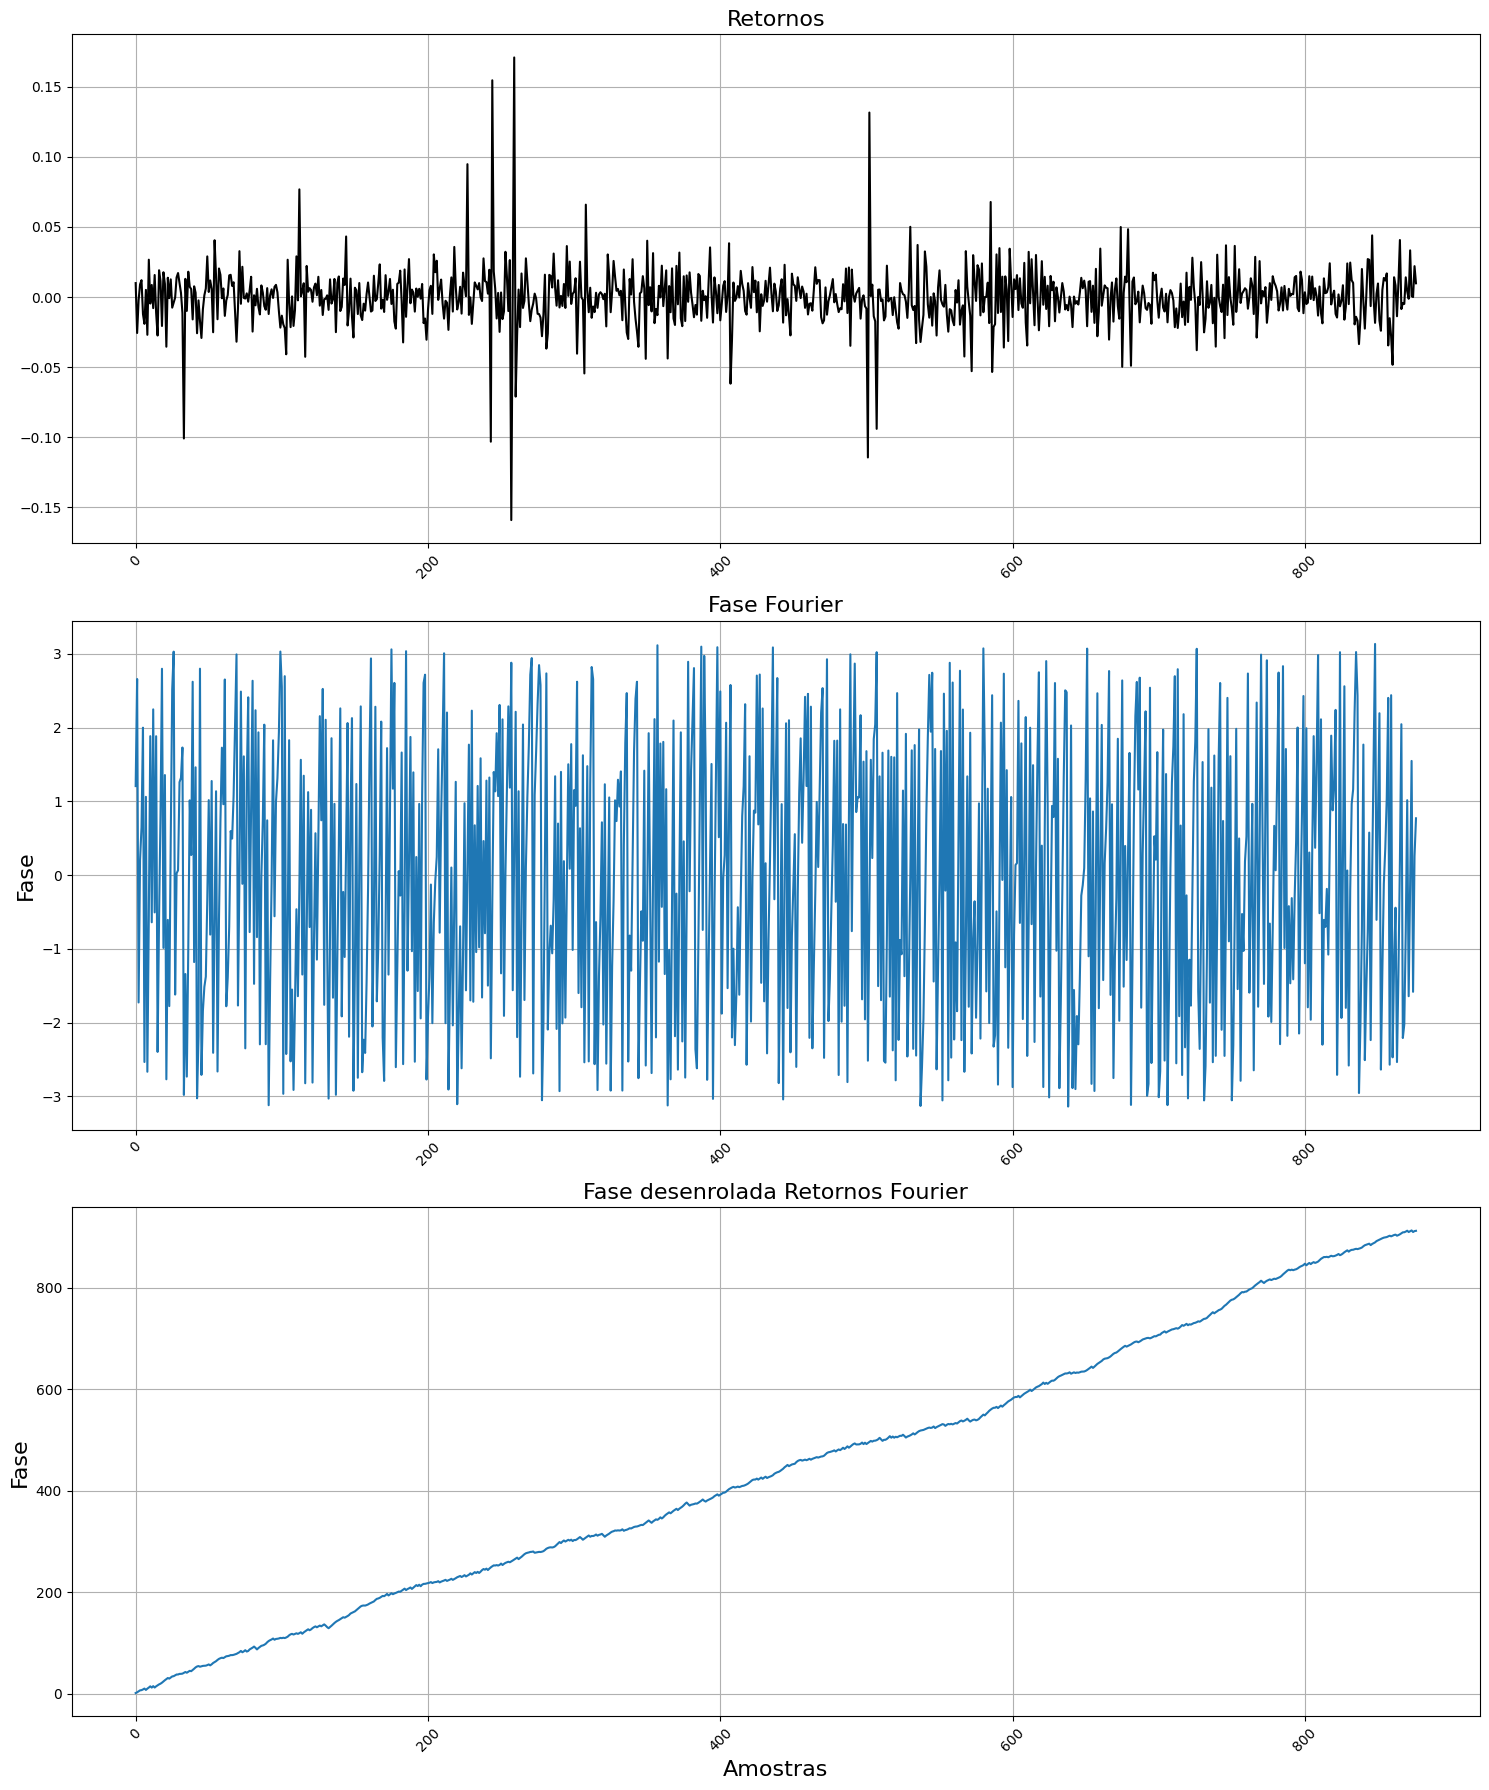

In [25]:
plt.figure(figsize=(15, 18))

# Primeiro subplot - Retornos
plt.subplot(3, 1, 1)
plt.plot(retornos, color='black')
plt.title('Retornos', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

# Segundo subplot - Fase Fourier
plt.subplot(3, 1, 2)
plt.plot(fase_retorno_fourier)
plt.title('Fase Fourier', fontsize=16)
plt.ylabel('Fase', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

# Terceiro subplot - Fase desenrolada Fourier
plt.subplot(3, 1, 3)
plt.plot(fase_unwrapped_fourier)
plt.title('Fase desenrolada Retornos Fourier', fontsize=16)
plt.xlabel('Amostras', fontsize=16)
plt.ylabel('Fase', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()

### Hilbert - Retornos

In [26]:
sinal = hilbert(retornos)
fase_retorno_hilbert = np.angle(sinal)
fase_unwrapped_hilbert = np.unwrap(fase_retorno_hilbert)

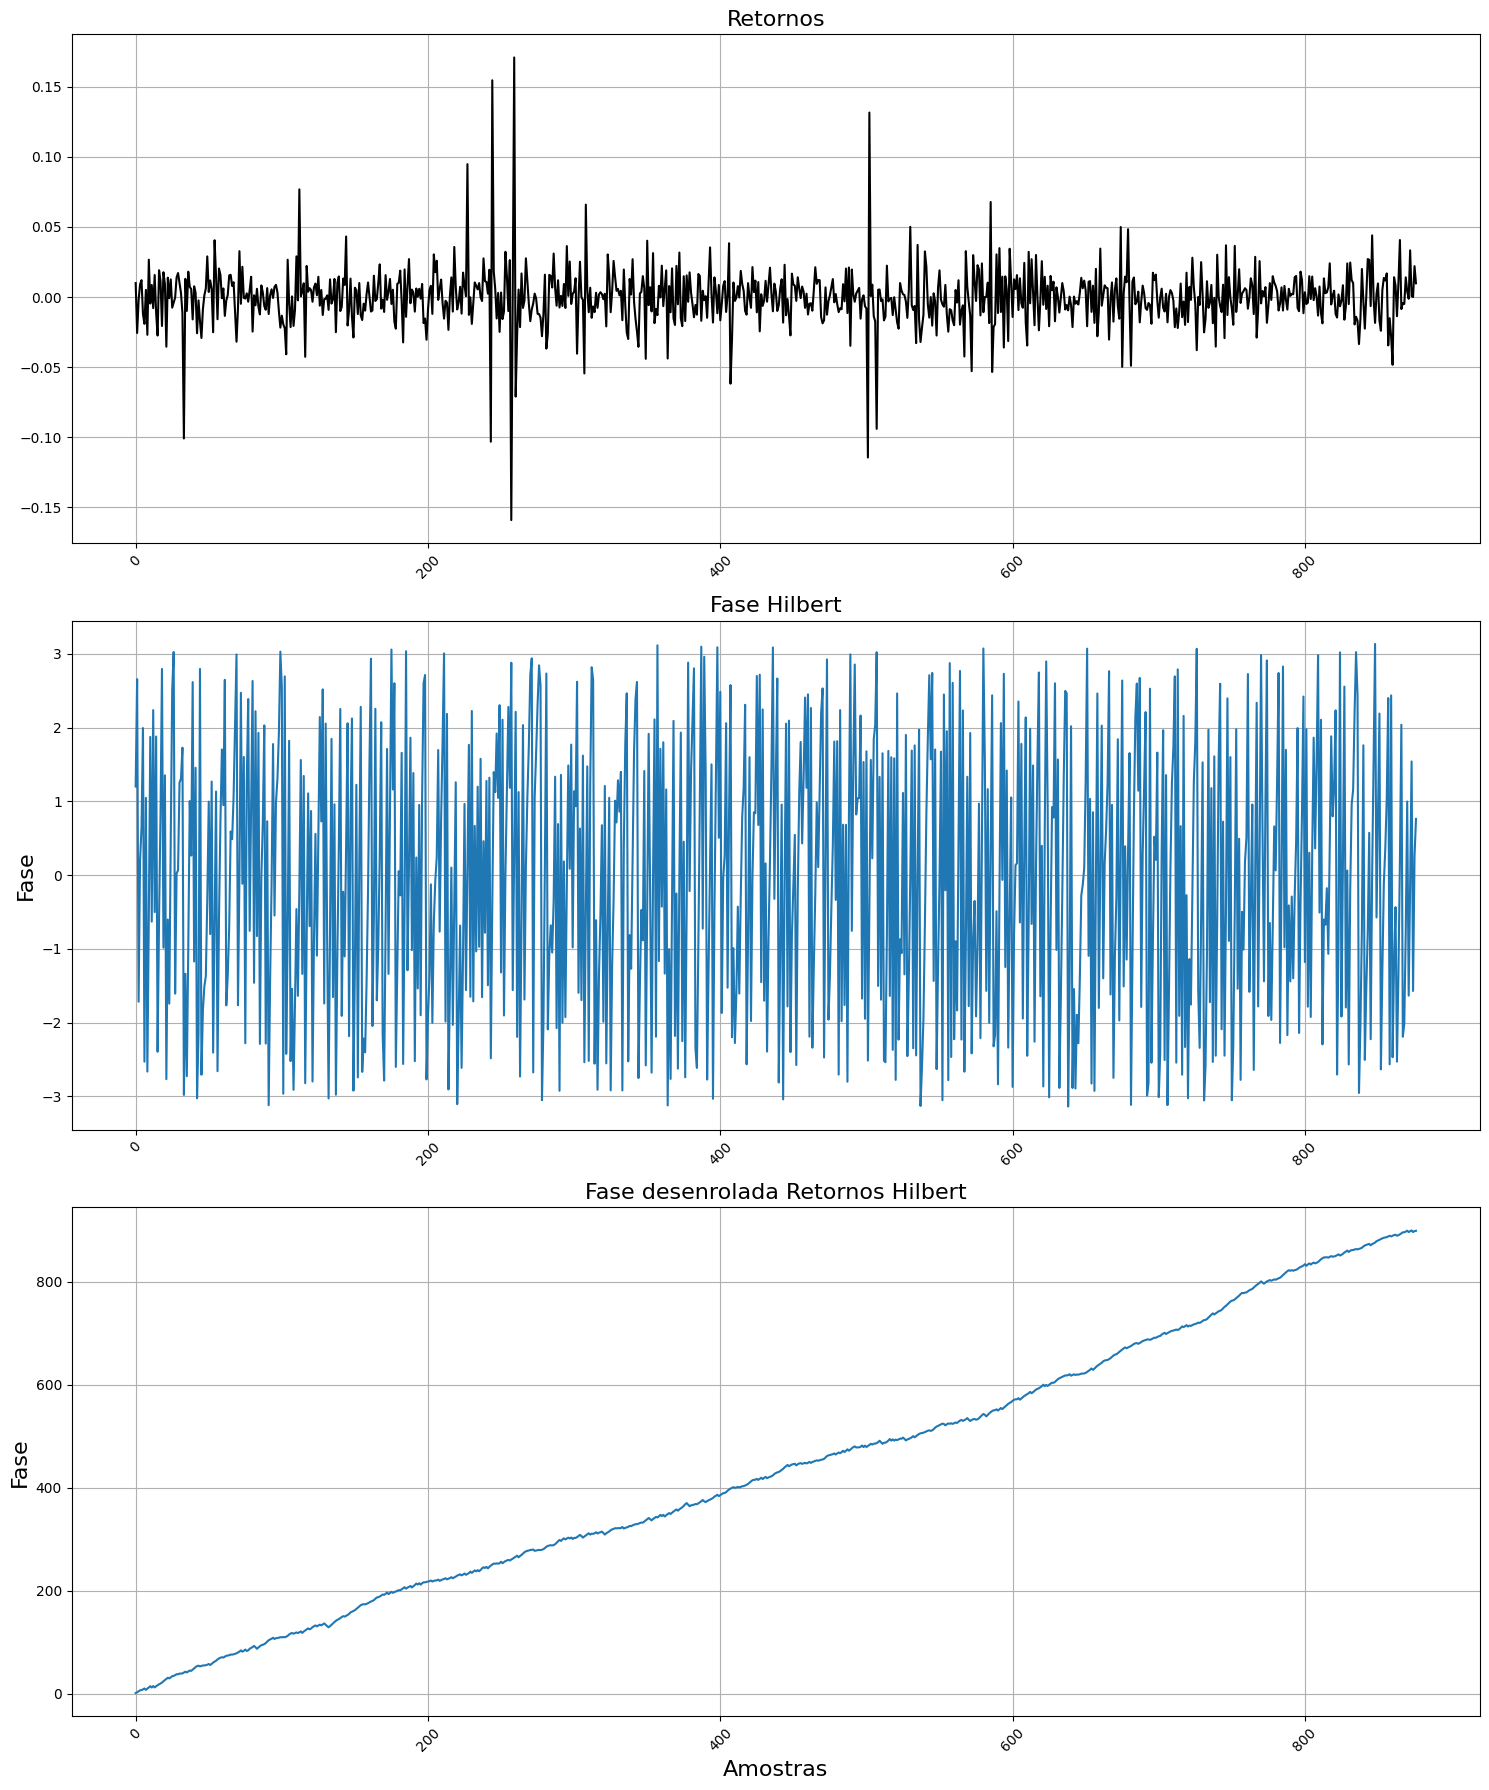

In [27]:
plt.figure(figsize=(15, 18))

# Primeiro subplot - Retornos
plt.subplot(3, 1, 1)
plt.plot(retornos, color='black')
plt.title('Retornos', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

# Segundo subplot - Fase Hilbert
plt.subplot(3, 1, 2)
plt.plot(fase_retorno_hilbert)
plt.title('Fase Hilbert', fontsize=16)
plt.ylabel('Fase', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

# Terceiro subplot - Fase desenrolada Hilbert
plt.subplot(3, 1, 3)
plt.plot(fase_unwrapped_hilbert)
plt.title('Fase desenrolada Retornos Hilbert', fontsize=16)
plt.xlabel('Amostras', fontsize=16)
plt.ylabel('Fase', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()

## Comparando as fases nas 3 transformadas

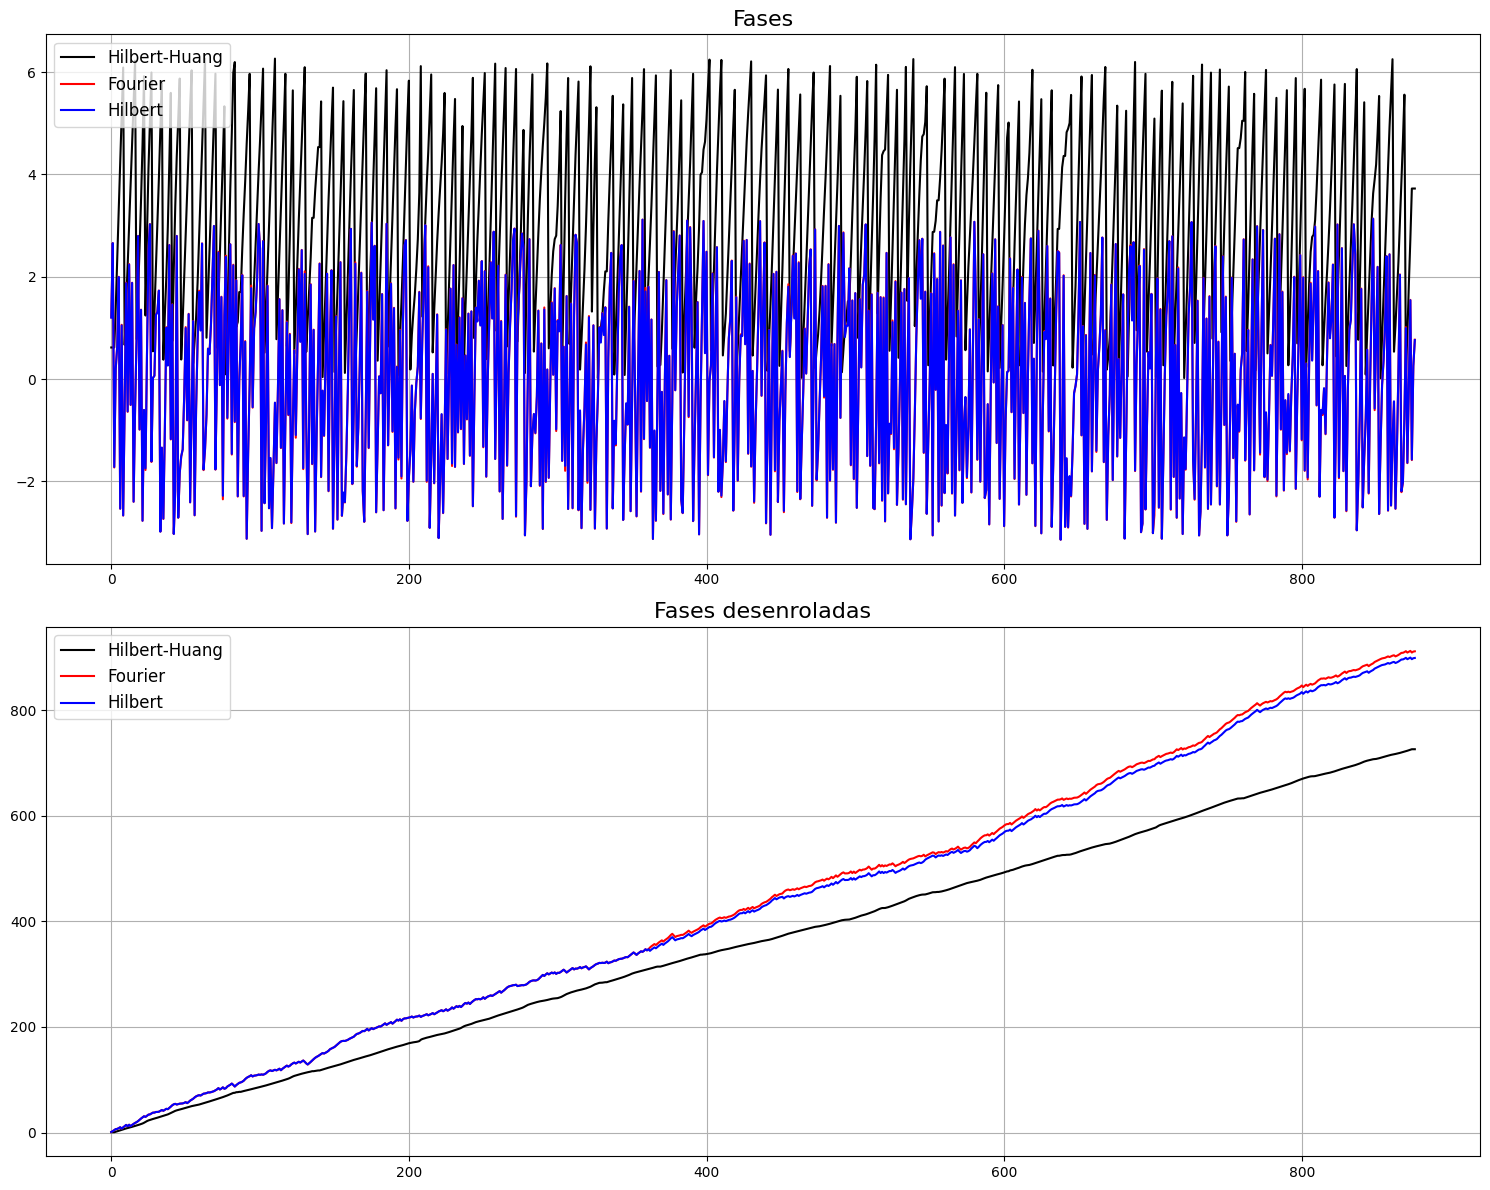

In [28]:
plt.figure(figsize=(15, 12))

# Primeiro subplot - Fases
plt.subplot(2, 1, 1)
plt.plot(IP[:, 1], color='black', label='Hilbert-Huang')
plt.plot(fase_retorno_fourier, color='red', label='Fourier')
plt.plot(fase_retorno_hilbert, color='blue', label='Hilbert')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.title('Fases', fontsize=16)

# Segundo subplot - Fases desenroladas
plt.subplot(2, 1, 2)
plt.plot(IP2_unwrapped, color='black', label='Hilbert-Huang')
plt.plot(fase_unwrapped_fourier, color='red', label='Fourier')
plt.plot(fase_unwrapped_hilbert, color='blue', label='Hilbert')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.title('Fases desenroladas', fontsize=16)

# Ajustar o layout
plt.tight_layout()

plt.show()

# Analisando a série de preços

## Hilbert-Huang - Preços
Gerar a primeira IMF

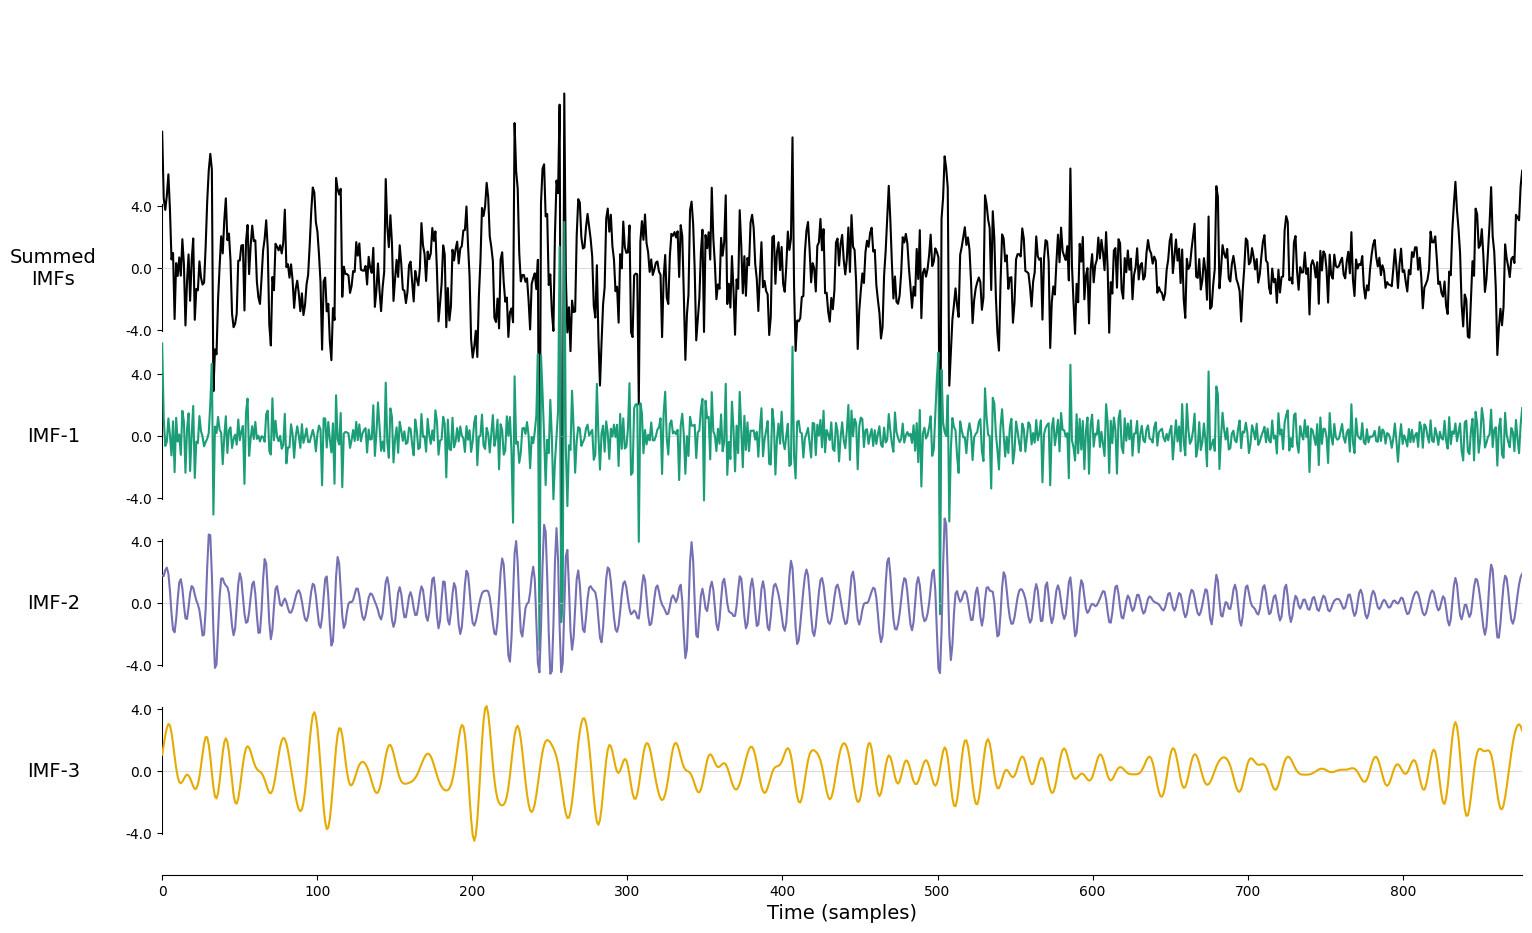

In [30]:
precos = np.array(sorriso['Valor'])
imf = emd.sift.mask_sift(precos, max_imfs=3)

emd.plotting.plot_imfs(imf)
plt.show()

In [31]:
#IP: Fase Instantânea, IF: Frequência instantânea, IA: Amplitude Instantânea
IP, IF, IA = emd.spectra.frequency_transform(imf, len(precos), 'nht')

IP1_unwrapped = np.unwrap(IP[:, 0])

### Fases Hilbert-Huang - Preços

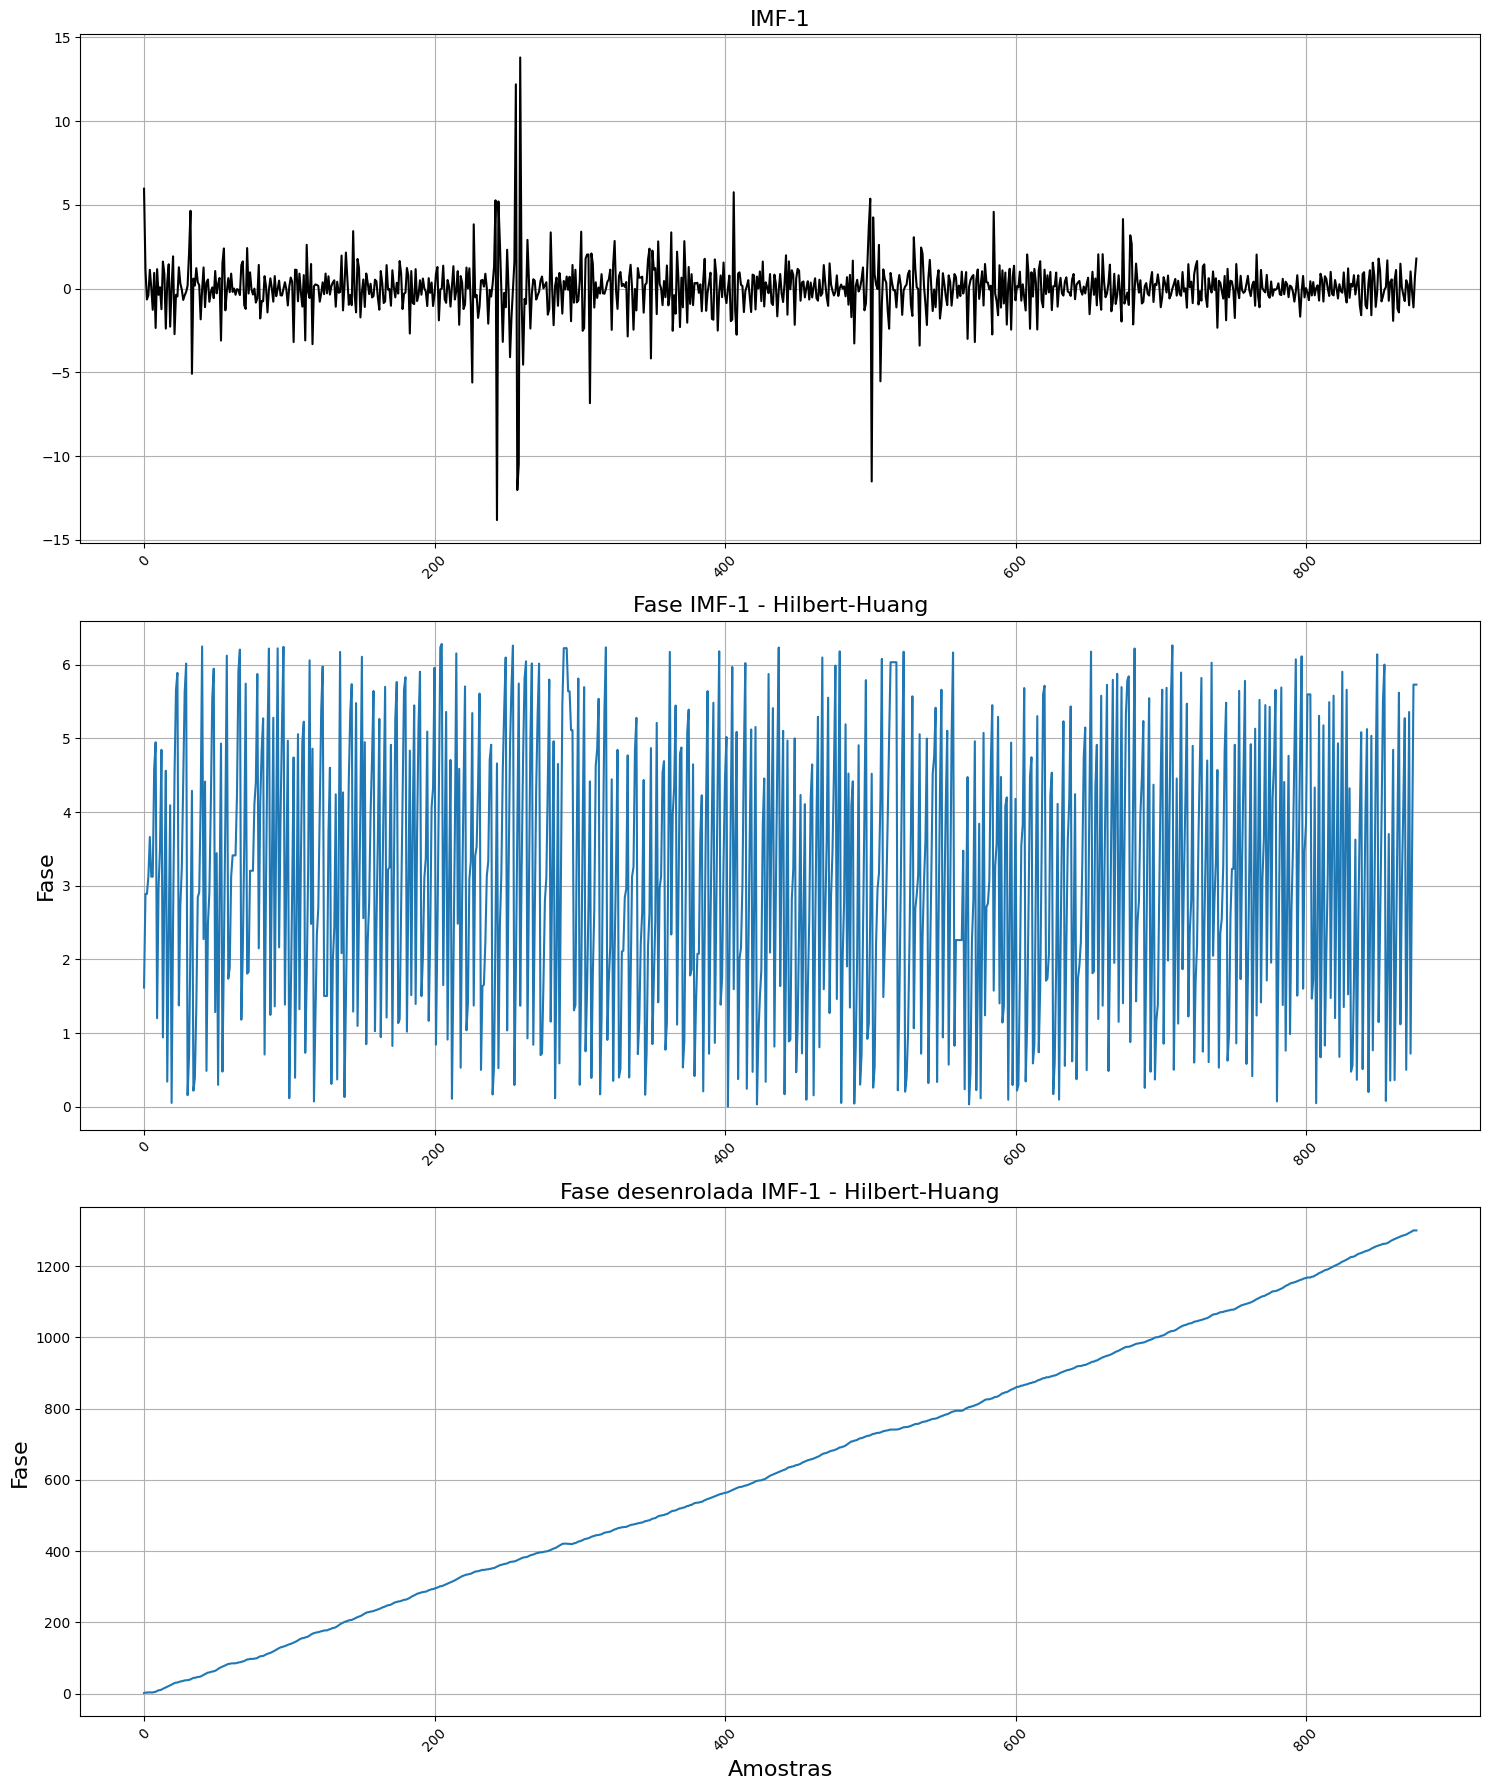

In [32]:
plt.figure(figsize=(15, 18))

# Primeiro subplot - IMF-1
plt.subplot(3, 1, 1)
plt.plot(imf[:, 0], color='black')
plt.title('IMF-1', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

# Segundo subplot - Fase IMF-1
plt.subplot(3, 1, 2)
plt.plot(IP[:, 0])
plt.title('Fase IMF-1 - Hilbert-Huang', fontsize=16)
plt.ylabel('Fase', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

# Terceiro subplot - Fase desenrolada IMF-1
plt.subplot(3, 1, 3)
plt.plot(IP1_unwrapped)
plt.title('Fase desenrolada IMF-1 - Hilbert-Huang', fontsize=16)
plt.xlabel('Amostras', fontsize=16)
plt.ylabel('Fase', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()

## Fourier - Preços

In [33]:
# Calcular a Transformada de Fourier
n = len(precos)
z = np.fft.fft(precos)
freq = np.fft.fftfreq(n)

# Zerar os valores com frequência negativa (apenas para considerar a parte positiva)
z[freq < 0] = 0

# Calcular a Transformada Inversa de Fourier
w = np.fft.ifft(z)

fase_preco_fourier = np.angle(w)

fase_unwrapped_fourier = np.unwrap(fase_preco_fourier)

### Fases Fourier - Preços

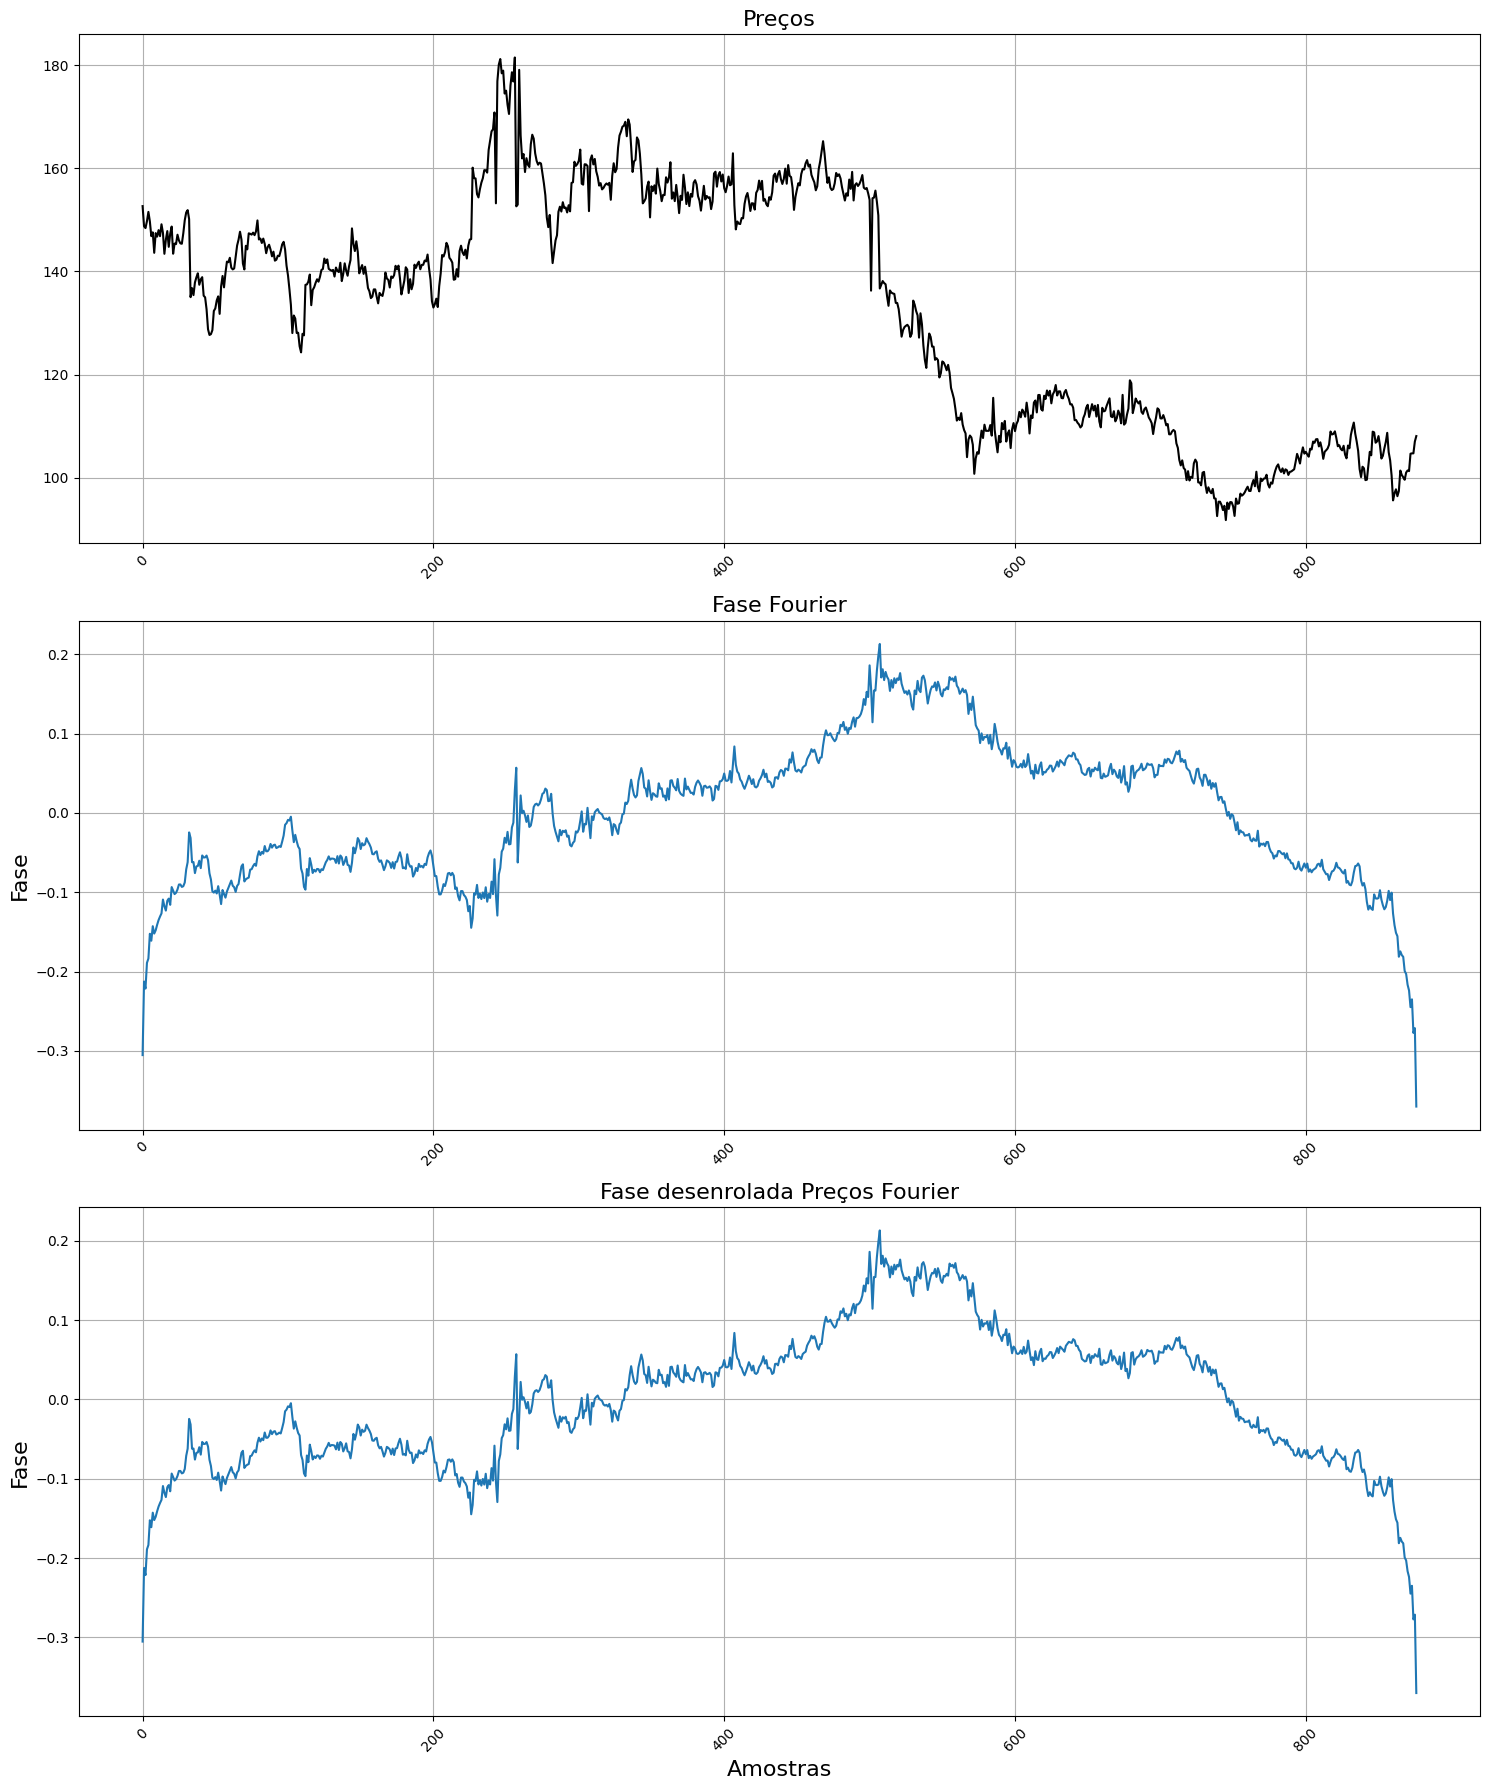

In [34]:
plt.figure(figsize=(15, 18))

# Primeiro subplot - Preços
plt.subplot(3, 1, 1)
plt.plot(precos, color='black')
plt.title('Preços', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

# Segundo subplot - Fase Fourier
plt.subplot(3, 1, 2)
plt.plot(fase_preco_fourier)
plt.title('Fase Fourier', fontsize=16)
plt.ylabel('Fase', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

# Terceiro subplot - Fase desenrolada Fourier
plt.subplot(3, 1, 3)
plt.plot(fase_unwrapped_fourier)
plt.title('Fase desenrolada Preços Fourier', fontsize=16)
plt.xlabel('Amostras', fontsize=16)
plt.ylabel('Fase', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()

## Hilbert - Preços

In [35]:
sinal = hilbert(precos)
fase_preco_hilbert = np.angle(sinal)
fase_unwrapped_hilbert = np.unwrap(fase_preco_hilbert)

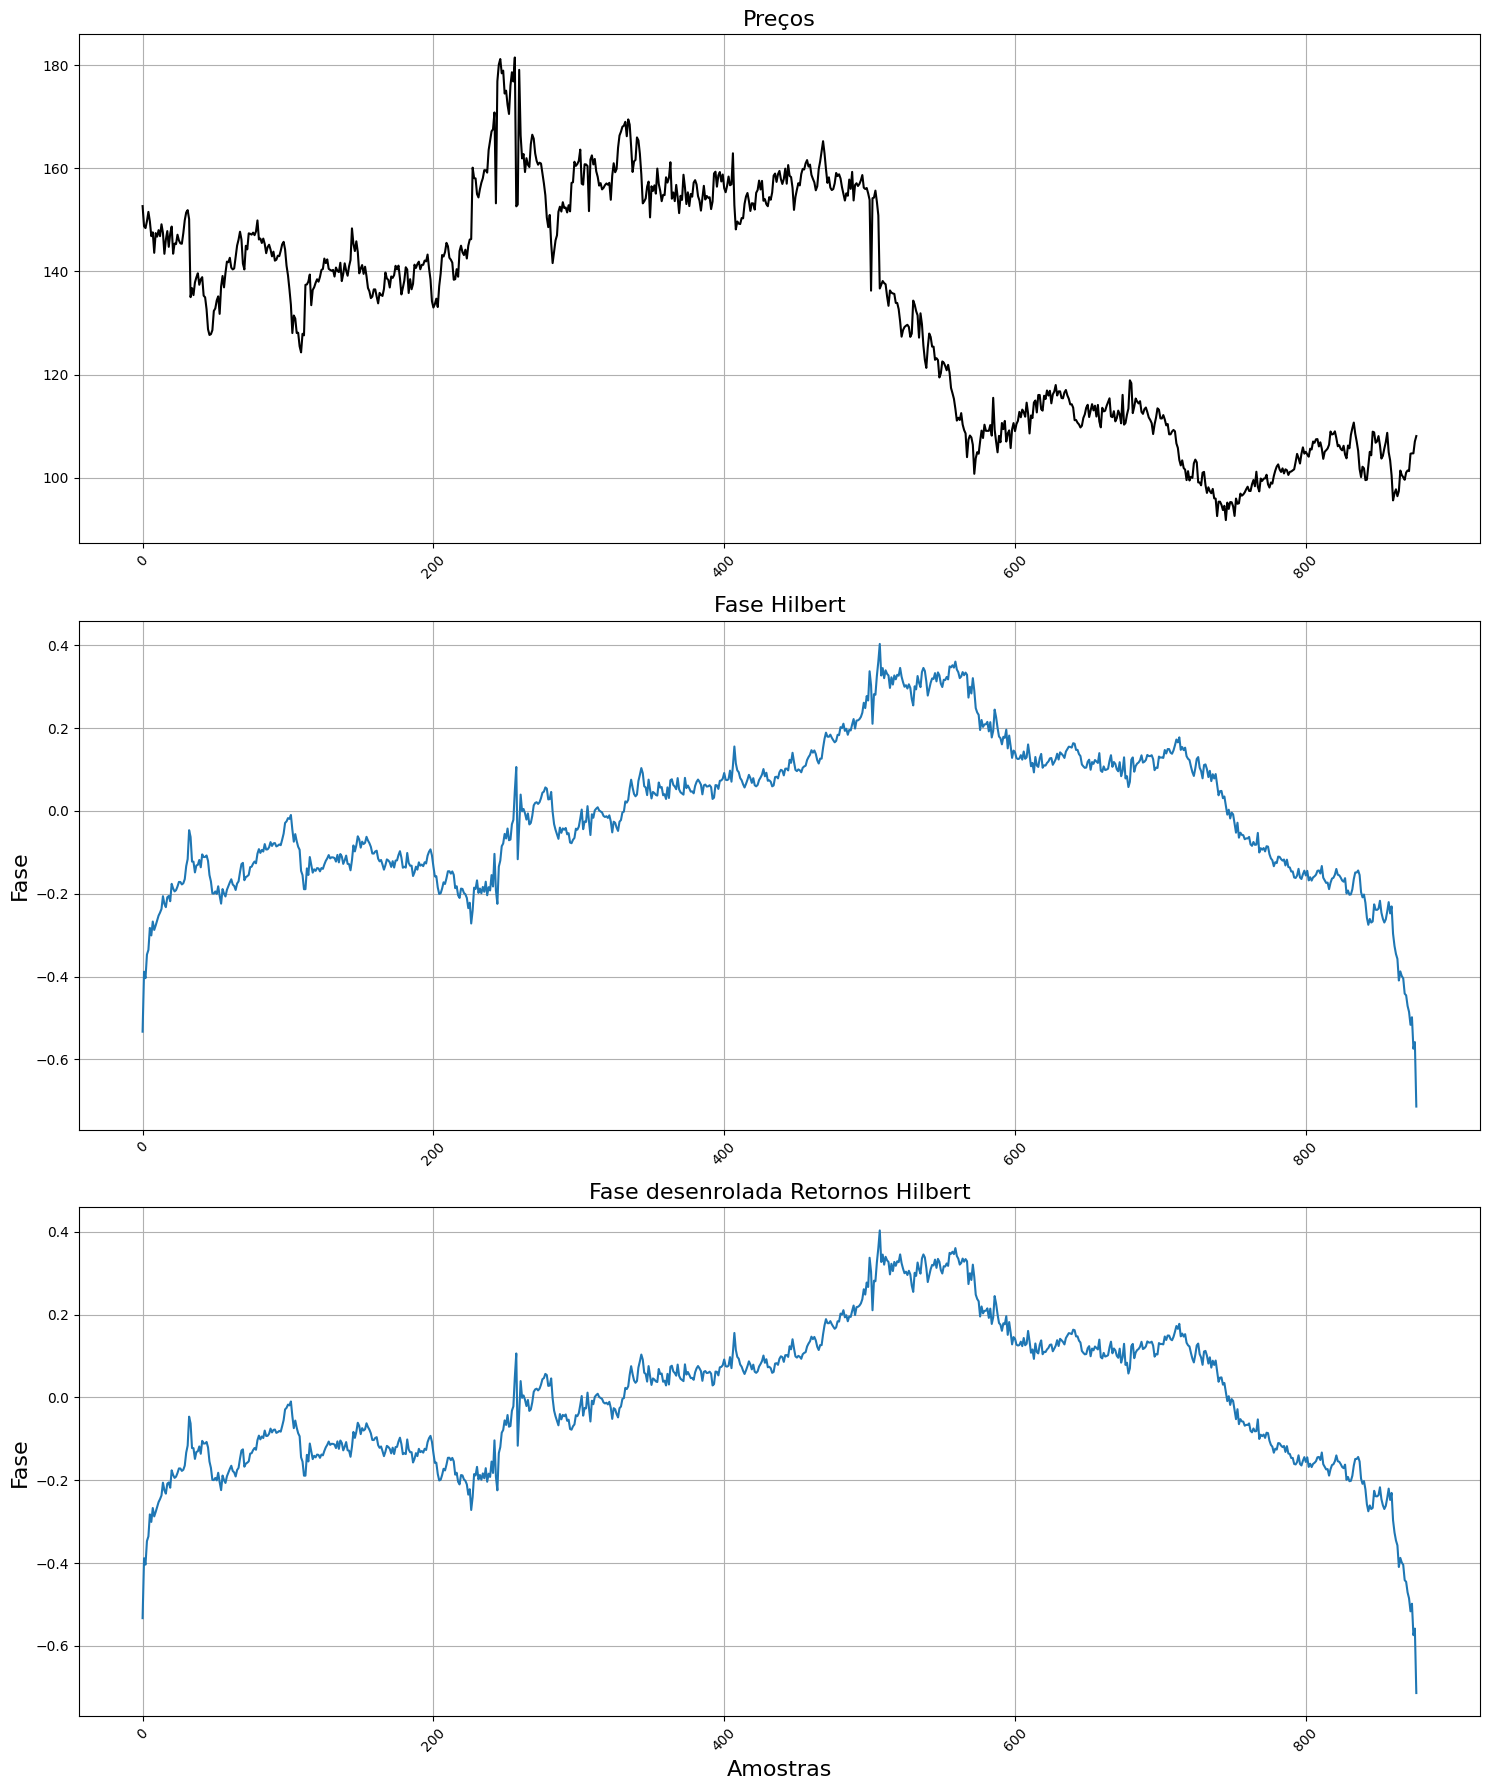

In [36]:
plt.figure(figsize=(15, 18))

# Primeiro subplot - Preços
plt.subplot(3, 1, 1)
plt.plot(precos, color='black')
plt.title('Preços', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

# Segundo subplot - Fase Hilbert
plt.subplot(3, 1, 2)
plt.plot(fase_preco_hilbert)
plt.title('Fase Hilbert', fontsize=16)
plt.ylabel('Fase', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

# Terceiro subplot - Fase desenrolada Hilbert
plt.subplot(3, 1, 3)
plt.plot(fase_unwrapped_hilbert)
plt.title('Fase desenrolada Retornos Hilbert', fontsize=16)
plt.xlabel('Amostras', fontsize=16)
plt.ylabel('Fase', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()

## Comparando as fases

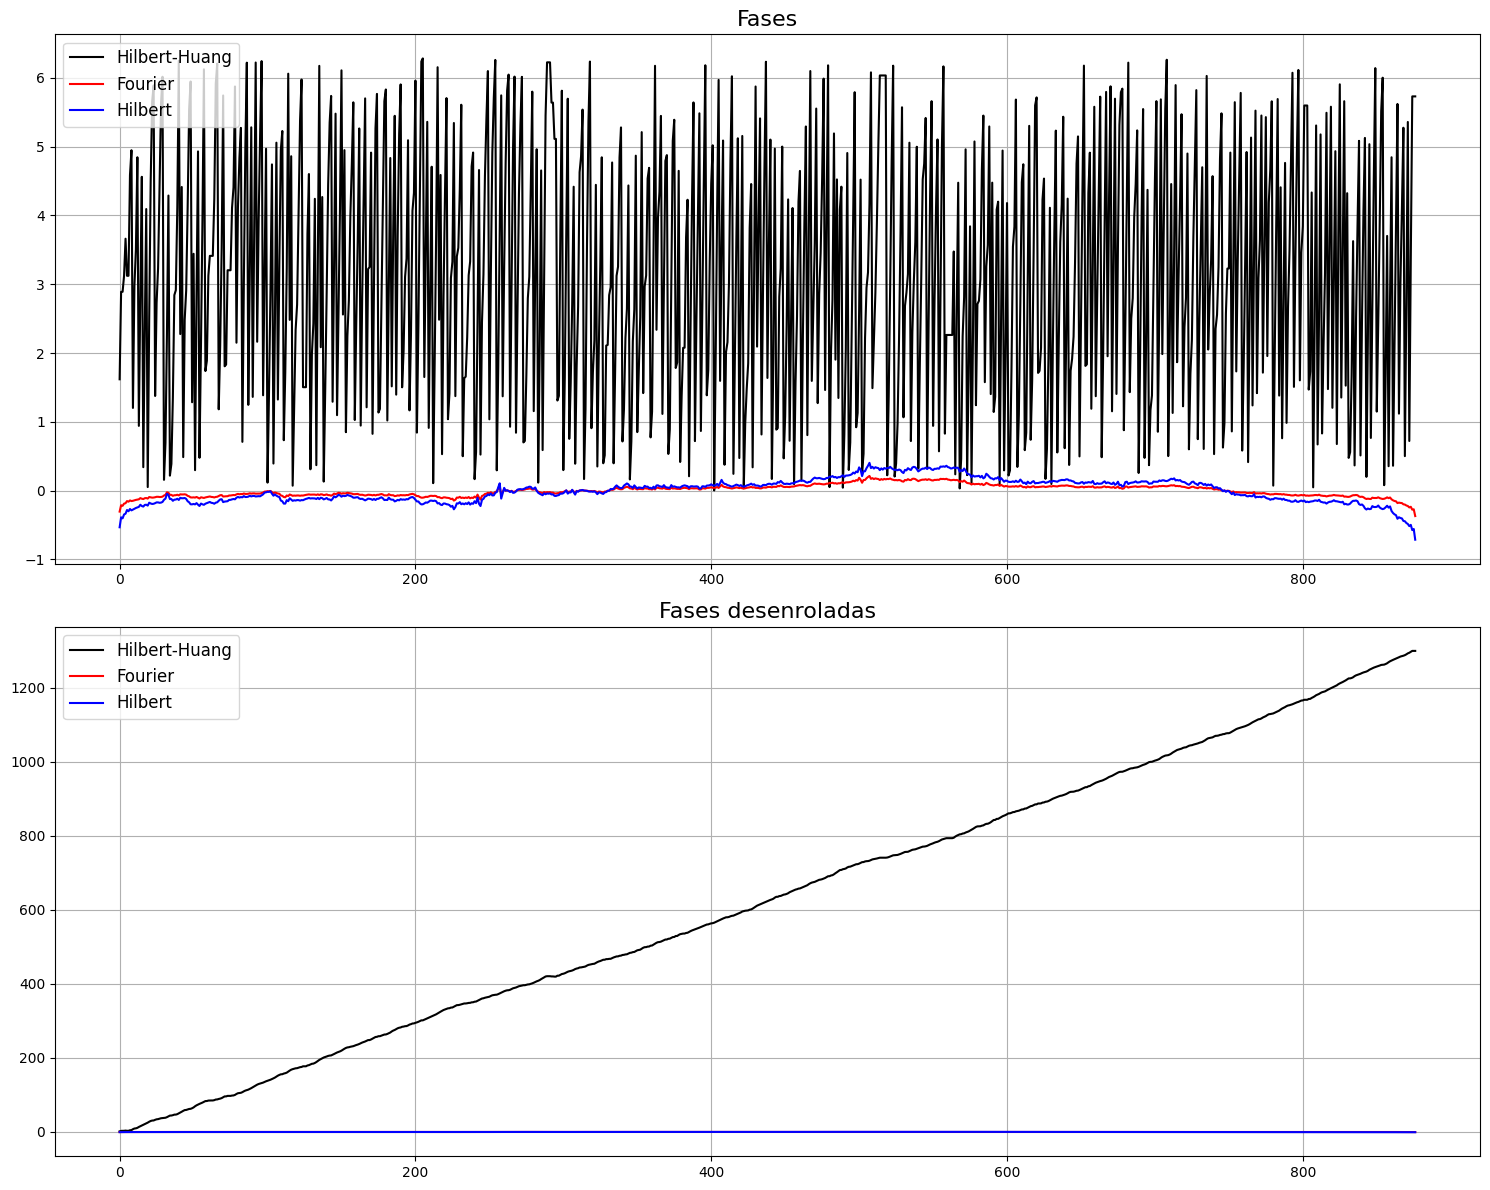

In [37]:
plt.figure(figsize=(15, 12))

# Primeiro subplot - Fases
plt.subplot(2, 1, 1)
plt.plot(IP[:, 0], color='black', label='Hilbert-Huang')
plt.plot(fase_preco_fourier, color='red', label='Fourier')
plt.plot(fase_preco_hilbert, color='blue', label='Hilbert')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.title('Fases', fontsize=16)

# Segundo subplot - Fases desenroladas
plt.subplot(2, 1, 2)
plt.plot(IP1_unwrapped, color='black', label='Hilbert-Huang')
plt.plot(fase_unwrapped_fourier, color='red', label='Fourier')
plt.plot(fase_unwrapped_hilbert, color='blue', label='Hilbert')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.title('Fases desenroladas', fontsize=16)

# Ajustar o layout
plt.tight_layout()

plt.show()